## Clean Up

Features to change:
1. Time
2. Emotion
3. Genre
4. Key
5. Major
6.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_json('data/final_milliondataset_BERT_500K_revised.json', lines=True)

In [3]:
spotify_green = '#1DB954'
light_green = '#7c987cff'

In [10]:
df.head

<bound method NDFrame.head of                                                      text  Length  emotion  \
0       Friends told her she was better off at the bot...     227  sadness   
1       Well I heard it, playing soft\nFrom a drunken ...     243  sadness   
2       Oh my god, did I just say that out loud?\nShou...     351      joy   
3       [Verse 1]\nRemember when I called you on the t...     224      joy   
4       [Verse 1]\nCalling me like I got something to ...     360      joy   
...                                                   ...     ...      ...   
551438  Can you be my (Can you be my)\nCan you be my (...     219      joy   
551439  [Verse]\nI gave you my everything\nBut I see I...     527      joy   
551440  [Tasha]               Hell on earth, watching ...     233  sadness   
551441  [Verse]\nGifts and flowers lay upon the lid\nO...     192  sadness   
551442  I wanna b with you\nI wanna b with you baby\nY...     212     love   

            Genre       Release D

In [91]:
df.head(50).to_csv('data/head_output_50rows.csv', index=False)

In [5]:
columns_to_drop = ['Artist(s)', 'song', 'Album','Similar Songs', 'ISRC']
df = df.drop(columns=columns_to_drop)

In [6]:
def length_to_seconds(length_str):
    try:
        minutes, seconds = map(int, length_str.split(':'))
        return minutes * 60 + seconds
    except:
        return None

df['Length'] = df['Length'].apply(length_to_seconds)

In [8]:
df['Loudness'] = df['Loudness (db)'].str.replace('db', '', case=False).astype(float)
df.drop('Loudness (db)', axis=1, inplace=True)

In [41]:
df['Single'] = df['Song Number'].str.strip().str.lower() == '1 of 1'
df.drop('Song Number', axis=1, inplace=True)
df['Single'] = df['Single'].astype(int)

In [12]:
# Change emotion to Bool encoded
df['emotion'] = df['emotion'].str.lower()
emotion_dummies = pd.get_dummies(df['emotion'], prefix='emotion', dtype=int)

df = pd.concat([df, emotion_dummies], axis=1)
df.drop('emotion', axis=1, inplace=True)

In [14]:
# Get sum of 1s (True) per emotion column
true_counts = emotion_dummies.sum()
# Get sum of 0s (False) per emotion column
false_counts = len(emotion_dummies) - true_counts

# Combine into a DataFrame for easy viewing
summary = pd.DataFrame({
    'True': true_counts,
    'False': false_counts
})
summary

,True,False
emotion_anger,109678,441765
emotion_angry,1,551442
emotion_confusion,1,551442
emotion_fear,28097,523346
emotion_interest,1,551442
emotion_joy,209009,342434
emotion_love,27966,523477
emotion_pink,2,551441
emotion_sadness,171078,380365
emotion_surprise,5592,545851


In [16]:
columns_to_drop = ['emotion_angry', 'emotion_confusion', 'emotion_pink', 'emotion_interest', 'emotion_thirst', 'emotion_true']
df = df.drop(columns=columns_to_drop)

In [19]:
for genre in df['Genre'].unique():
    print(genre)

hip hop
jazz
indie rock,britpop
classical
rock,pop,comedy
rock,pop rock
rap,hip hop
trance,electronic,psychedelic
country,classic rock,hard rock
hip hop,trap,cloud rap
electronic,rap
rock,hardcore,garage rock
pop
chillout,psychedelic,electronic
alternative rock,new wave
hip-hop,hip hop
punk,punk rock
k-pop
metal,hard rock,heavy metal
rock,synthpop,alternative rock
country,pop
folk
alternative rock,indie rock,indie
rock
electronic,dance,electropop
trap
cloud rap
reggae,dub
electronic,comedy
rock,alternative rock,metal
industrial
rock,psychedelic
rock,classic rock,progressive rock
electronic
soul,hip hop,pop
rock,pop,blues
punk rock,pop punk
metal,black metal
garage rock,psychedelic rock
nu metal
experimental
blues
reggae
pop,pop rock
black metal,doom metal,metal
alternative rock,post-punk,new wave
drum and bass,electronic
electronic,synthpop,pop
pop,jazz,swing
trance,dance,house
hip hop,trap
dance
punk rock,punk,rock
rock,trance,electronic
electronic,pop,house
pop rock
trance,electronic

In [26]:
def count_songs_per_genre(df):
    # Drop NaN values in 'Genre' column
    genres_series = df['Genre'].dropna()
    # Split genres by comma and explode into separate rows
    exploded_genres = genres_series.str.split(',').explode().str.strip().str.lower()
    # Count occurrences of each genre
    genre_counts = exploded_genres.value_counts()
    return genre_counts

genre_counts = count_songs_per_genre(df)

# Assuming df is your DataFrame
for genre, count in genre_counts.items():
    print(f"{genre}: {count}")

hip hop: 291844
rock: 84112
pop: 64388
alternative rock: 40271
indie rock: 22744
pop rock: 22592
electronic: 21474
folk: 20268
country: 16441
jazz: 16051
rap: 15969
soul: 15947
metal: 15583
trap: 15326
heavy metal: 13143
blues: 12786
hard rock: 11958
punk: 11427
indie pop: 10617
progressive rock: 10097
synthpop: 9215
hip-hop: 8794
reggae: 8511
electropop: 8375
funk: 6985
psychedelic rock: 6976
punk rock: 6658
indie: 6471
classic rock: 5822
new wave: 5782
classical: 5475
dance: 4667
metalcore: 4469
post-hardcore: 4384
progressive metal: 4117
emo: 4056
pop punk: 3876
alternative: 3870
post-punk: 3581
experimental: 3550
soundtrack: 3508
gospel: 3339
ambient: 3335
swing: 3320
rnb: 3099
thrash metal: 2896
drum and bass: 2639
death metal: 2508
cloud rap: 2489
house: 2485
trance: 2447
disco: 2358
lo-fi: 2281
dream pop: 2176
shoegaze: 2173
industrial: 2137
nu metal: 2090
dub: 2050
grunge: 2026
power metal: 1864
christian: 1740
emo rap: 1719
garage rock: 1650
melodic death metal: 1619
dancehall

In [76]:
genre_map = {
    'rock': ['rock', 'alternative rock', 'indie rock', 'pop rock', 'hard rock', 'punk', 'punk rock', 'indie', 'classic rock', 'psychedelic rock', 'garage rock', 'grunge', 'shoegaze', 'math rock', 'progressive rock', 'new wave', 'britpop', 'alternative', 'post-punk', 'psychedelic'],
    'metal': ['metal', 'heavy metal', 'metalcore', 'progressive metal', 'thrash metal', 'death metal', 'nu metal', 'power metal', 'melodic death metal', 'black metal', 'deathcore', 'doom metal'],
    'pop': ['pop', 'indie pop', 'synthpop', 'electropop', 'pop punk', 'dance', 'k-pop', 'j-pop', 'reggaeton'],
    'electronic': ['electronic', 'electro', 'house', 'trance', 'dubstep', 'drum and bass', 'trip-hop', 'chillout', 'chillwave', 'ambient', 'lo-fi', 'techno', 'dancehall'],
    'rap': ['rap', 'hip hop', 'hip-hop', 'trap', 'cloud rap', 'emo rap', 'grime'],
    'folk': ['folk', 'country', 'alt-country', 'acoustic'],
    'rnb': ['rnb', 'soul', 'funk', 'gospel', 'swing'],
    'classical': ['classical'],
    'jazz': ['jazz', 'blues', 'swing'],  # Note: 'swing' is also in rnb, but you can decide where it fits best
    'religious': ['christian', 'worship'],
    'others': ['soundtrack', 'comedy', 'latin', 'experimental', 'industrial', 'blues', 'disco', 'dub', 'dream pop', 'reggae', 'hardcore', 'screamo', 'emo', 'grime', 'cloud', 'psychedelic', None]
}

# Function to map genre string to grouped genres
def map_to_group_with_others(genre_str, genre_map):
    if pd.isna(genre_str):
        return 'unknown'
    genres = [g.strip().lower() for g in genre_str.split(',')]
    groups = set()
    for g in genres:
        for group, subgenres in genre_map.items():
            if g in subgenres and group != 'others':  # Skip 'others' as a main group here
                groups.add(group)
    # Always add 'others' if any genre is in the 'others' sublist
    for g in genres:
        if g in genre_map['others']:
            groups.add('others')

    if len(groups) < 1:
        return 'unknown'
    return ', '.join(groups)

df['Genre Grouped'] = df['Genre'].apply(lambda x: map_to_group_with_others(x, genre_map))

In [74]:
# To Drop Columns
# df.drop(columns=df.filter(like='genre_').columns, inplace=True)

In [77]:
# Split the Genre Grouped column and create dummy variables
dummies = df['Genre Grouped'].str.get_dummies(sep=', ')

# Optionally, add a prefix for clarity
dummies = dummies.add_prefix('genre_')

# Join the dummy columns back to your DataFrame if desired
df = df.join(dummies)

df.drop(columns=['Genre', 'Genre Grouped'], inplace=True)

In [67]:
# #multi label binary
# genre_mapping = {
#     'hip-hop': 'hip hop',
#     'indie rock': 'indie',
#     'punk rock': 'punk',
#     'electro': 'electronic',
#     'alternative rock': 'alternative',
# }
#
# df['genre_list'] = df['Genre'].str.split(',\s*')
#
# #apply genre mapping
# df['genre_list'] = df['genre_list'].apply(
#     lambda genres: [genre_mapping.get(g.strip().lower(), g.strip().lower()) for g in genres]
# )
#
# all_genres = [genre for sublist in df['genre_list'] for genre in sublist]
#
# unique_genres = sorted(set(all_genres))
#
# print(f"Total unique genres: {len(unique_genres)}")

Total unique genres: 83


In [35]:
# #binary features
# from sklearn.preprocessing import MultiLabelBinarizer
#
# mlb = MultiLabelBinarizer()
# genre_dummies = pd.DataFrame(mlb.fit_transform(df['genre_list']),
#                              columns=mlb.classes_,
#                              index=df.index)
#
# #combine
# df = pd.concat([df, genre_dummies], axis=1)
# df.drop(['Genre', 'genre_list'], axis=1, inplace=True)
# # print(df.dtypes)
# print("Unique genres:")
# for genre in unique_genres:
#     print(repr(genre))

KeyError: 'genre_list'

In [36]:
df['Explicit'] = df['Explicit'].map({'No': 0, 'Yes': 1})

In [43]:
import re
from datetime import datetime

def clean_date(date_str):
    if pd.isnull(date_str):
        return None
    cleaned = re.sub(r'(\d+)(st|nd|rd|th)', r'\1', str(date_str))  # Remove suffixes
    return cleaned.strip()

df['Release Date'] = df['Release Date'].apply(clean_date)

df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

current_year = datetime.today().year

df['Age'] = current_year - df['Release Date'].dt.year
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month


df[['Age', 'Year', 'Month']] = df[[
    'Age', 'Year', 'Month'
]].fillna(-1)

df.drop(columns=['Release Date'], inplace=True)

df[['Age', 'Year', 'Month']]

,Age,Year,Month
0,12,2013,4
1,12,2013,4
2,21,2004,6
3,10,2015,10
4,10,2015,10
...,...,...,...
551438,5,2020,10
551439,3,2022,4
551440,2,2023,8
551441,17,2008,6


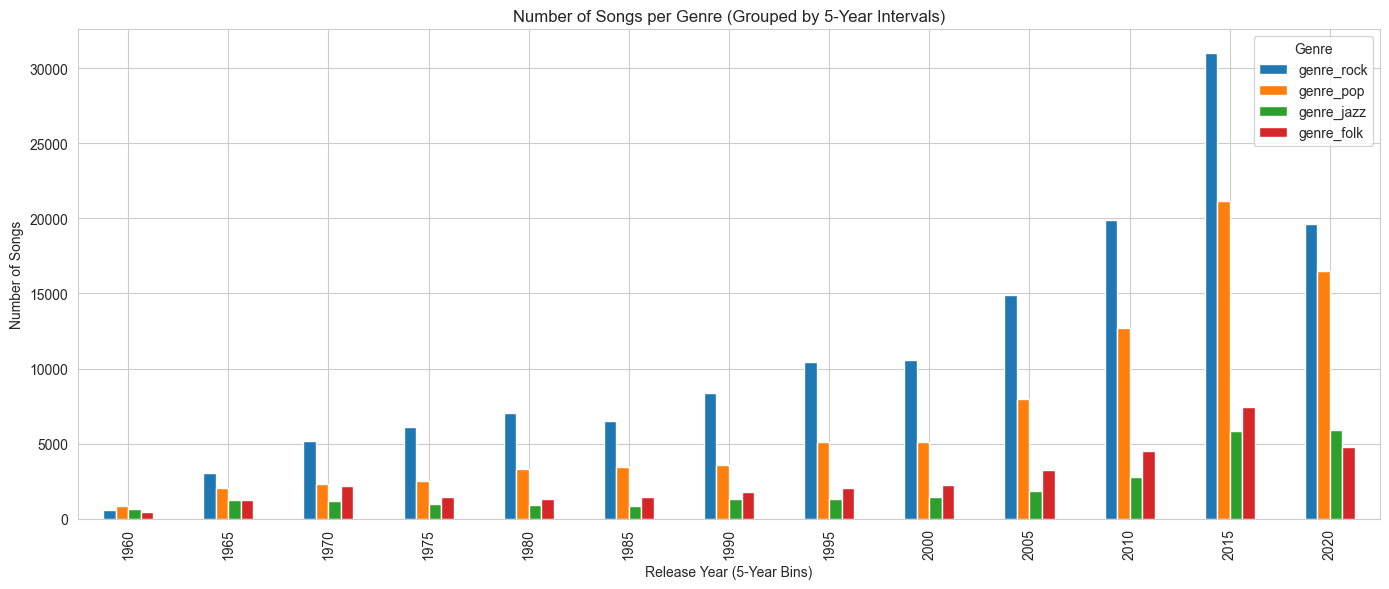

In [47]:
df = df.dropna(subset=['Year'])
df['Year Bin'] = (df['Year'] // 5) * 5

last_50_years = df[(df['Year'] > 1960)]
# last_50_years = last_50_years[(last_50_years['Popularity'] >= 70)]

# Step 2: Choose genres of interest
target_genres = ['genre_rock', 'genre_pop', 'genre_jazz', 'genre_folk']

# Step 3: Group by year bin and sum genre columns
genre_counts = last_50_years.groupby('Year Bin')[target_genres].sum()

# Step 4: Plot
genre_counts.plot(kind='bar', figsize=(14, 6))
plt.title('Number of Songs per Genre (Grouped by 5-Year Intervals)')
plt.xlabel('Release Year (5-Year Bins)')
plt.ylabel('Number of Songs')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

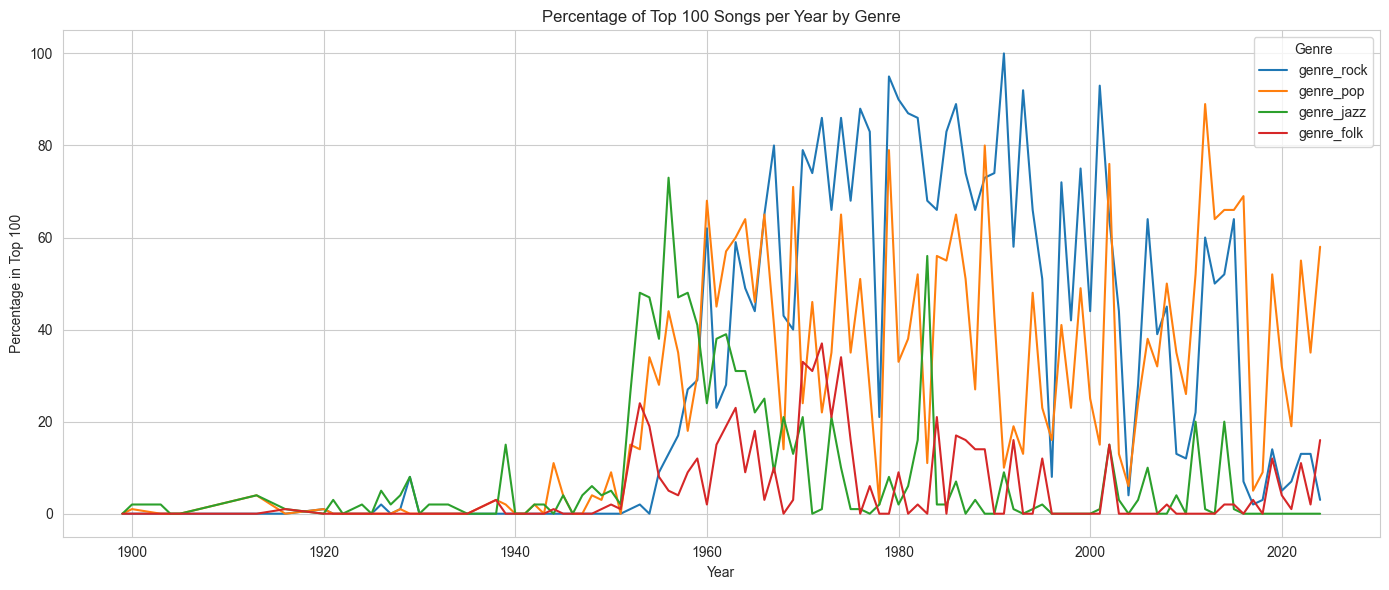

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Define target genres
target_genres = ['genre_rock', 'genre_pop', 'genre_jazz', 'genre_folk']

# Ensure Year is numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Year'])

# Keep only rows with at least one target genre
df_genres = df[df[target_genres].sum(axis=1) > 0]

# Step 1: Get top 100 songs per year
top100_per_year = (
    df.sort_values(['Year', 'Popularity'], ascending=[True, False])
    .groupby('Year')
    .head(100)
)

# Step 2: Compute genre presence in top 100 songs
genre_percentage = (
                           top100_per_year.groupby('Year')[target_genres].sum() / 100
                   ).fillna(0) * 100  # convert to percentage

# Step 3: Plot
genre_percentage.plot(figsize=(14, 6))
plt.title('Percentage of Top 100 Songs per Year by Genre')
plt.xlabel('Year')
plt.ylabel('Percentage in Top 100')
plt.legend(title='Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

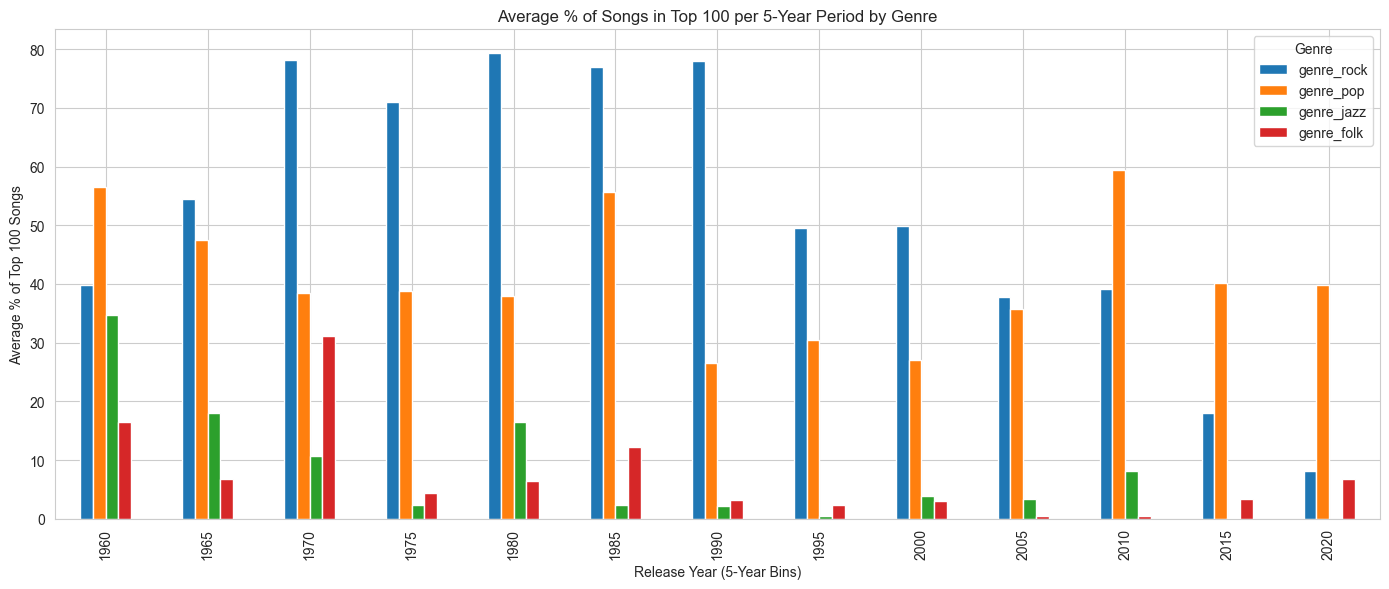

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your target genres
target_genres = ['genre_rock', 'genre_pop', 'genre_jazz', 'genre_folk']

# Ensure Year is numeric and clean
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Year'])

# Step 1: Sort and get Top 100 songs per year
top100 = (
    df.sort_values(['Year', 'Popularity'], ascending=[True, False])
    .groupby('Year')
    .head(100)
)

top100 = top100[(top100['Year'] > 1960)]
# Step 2: Bin years into 5-year periods
top100['Year Bin'] = (top100['Year'] // 5) * 5

# Step 3: For each 5-year bin, calculate % of Top 100 songs per genre
genre_counts = top100.groupby(['Year Bin'])[target_genres].sum()
total_counts = top100.groupby('Year Bin').size()  # should be 100 per year, but robust
genre_percentages = genre_counts.div(total_counts, axis=0) * 100

# Step 4: Plot as a grouped bar chart
genre_percentages.plot(kind='bar', figsize=(14, 6))
plt.title('Average % of Songs in Top 100 per 5-Year Period by Genre')
plt.xlabel('Release Year (5-Year Bins)')
plt.ylabel('Average % of Top 100 Songs')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


In [50]:
df['Major'] = df['Key'].apply(lambda x: 0 if 'min' in str(x).lower() else (1 if 'maj' in str(x).lower() else None))
key_dummies = pd.get_dummies(df['Key'], prefix='key', dtype=int)
df = pd.concat([df, key_dummies], axis=1)
df.drop('Key', axis=1, inplace=True)

In [51]:
#time signature
df['Time signature'] = df['Time signature'].str.strip()

ts_dummies = pd.get_dummies(df['Time signature'], prefix='ts', dtype=int)
df = pd.concat([df, ts_dummies], axis=1)

df.drop(['Time signature'], axis=1, inplace=True)

In [52]:
df.isnull().sum()

text          0
Length        0
Genre         0
Tempo         0
Explicit      0
             ..
key_G# min    0
ts_1/4        0
ts_3/4        0
ts_4/4        0
ts_5/4        0
Length: 76, dtype: int64

In [23]:
df.info

<bound method DataFrame.info of                                                      text  Length     Tempo  \
0       Friends told her she was better off at the bot...     227  0.437870   
1       Well I heard it, playing soft From a drunken b...     243  0.508876   
2       Oh my god, did I just say that out loud? Shoul...     351  0.532544   
3       [Verse 1] Remember when I called you on the te...     224  0.538462   
4       [Verse 1] Calling me like I got something to s...     360  0.544379   
...                                                   ...     ...       ...   
498047  Can you be my (Can you be my) Can you be my (C...     219  0.644970   
498048  [Verse] I gave you my everything But I see I c...     527  0.573964   
498049  [Tasha]               Hell on earth, watching ...     233  0.260355   
498050  [Verse] Gifts and flowers lay upon the lid Of ...     192  0.562130   
498051  I wanna b with you I wanna b with you baby Yea...     212  0.408284   

        Loudness (d

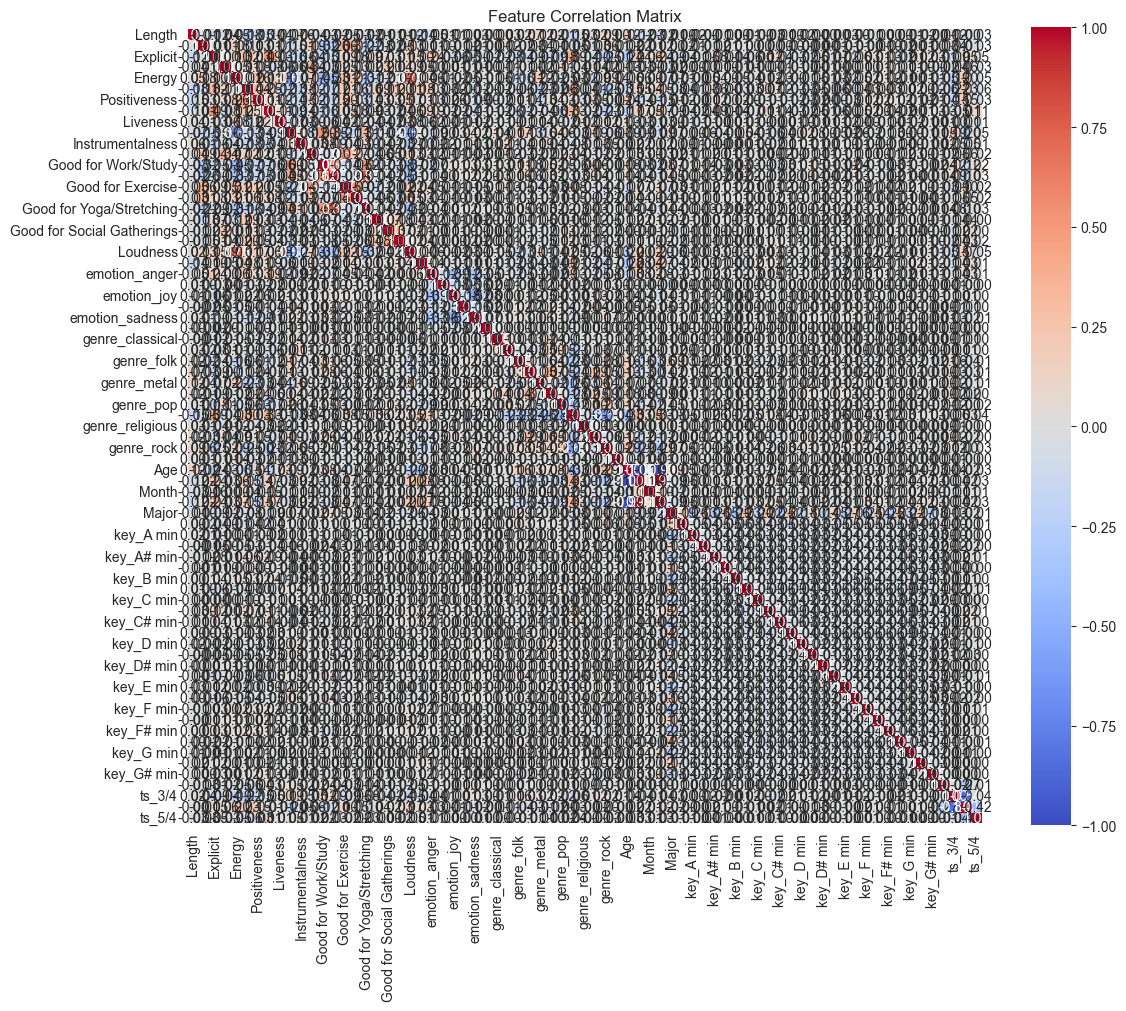

In [53]:
from matplotlib import pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Plot correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

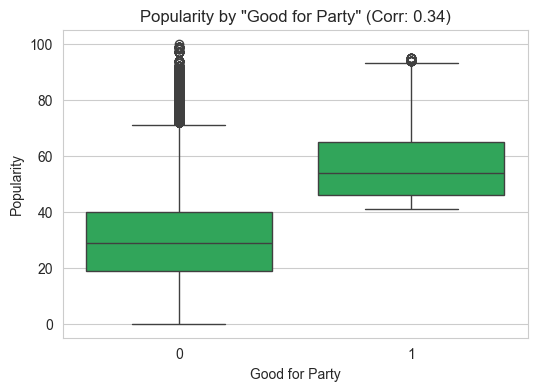

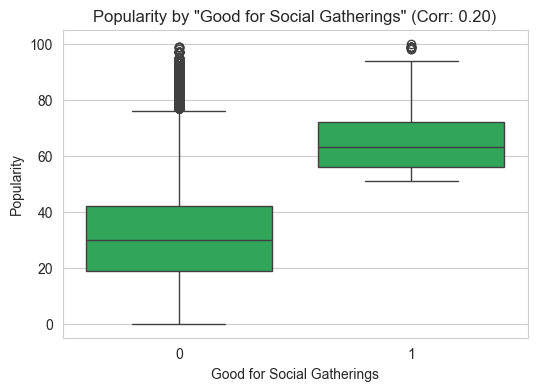

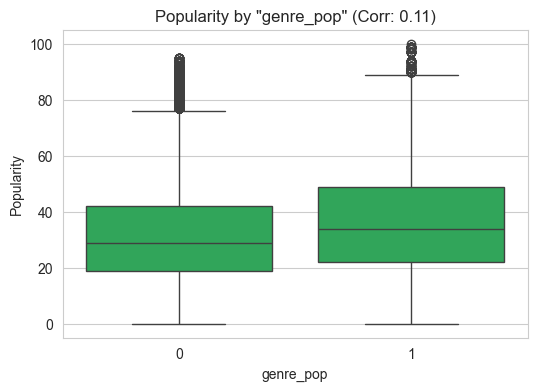

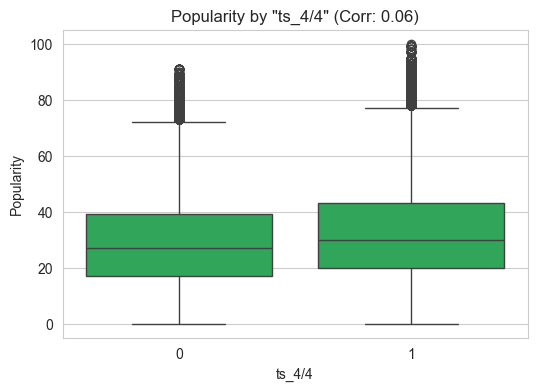

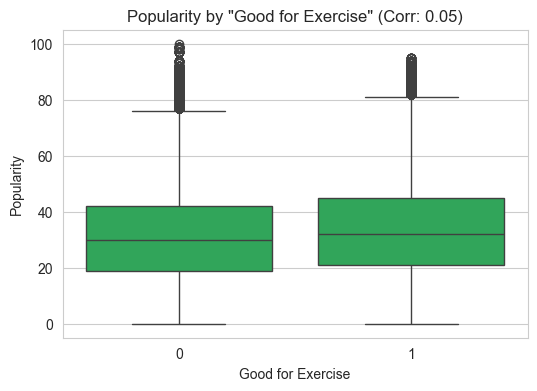

In [79]:
# Identify binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Compute correlations
corrs = df[binary_cols + ['Popularity']].corr()['Popularity'].drop('Popularity')

# Keep meaningful correlation
relevant_binary = corrs[abs(corrs) > 0.05].sort_values(ascending=False)

# Step 4: Plot boxplots
for col in relevant_binary.index:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col, y='Popularity', color=spotify_green)
    plt.title(f'Popularity by "{col}" (Corr: {corrs[col]:.2f})')
    plt.show()

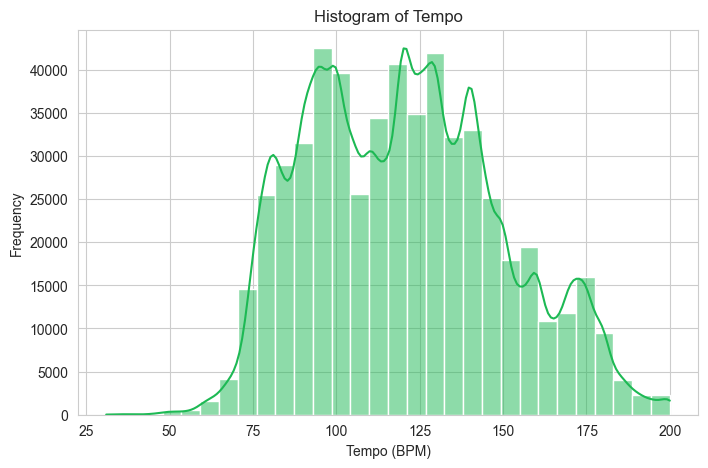

In [78]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Tempo', bins=30, kde=True, color=spotify_green)  # kde=True adds a smooth curve
plt.title('Histogram of Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.show()

In [31]:
df['Tempo zone'] = pd.cut(df['Tempo'], bins=[0, 90, 120, 200], labels=['Slow', 'Medium', 'Fast'])

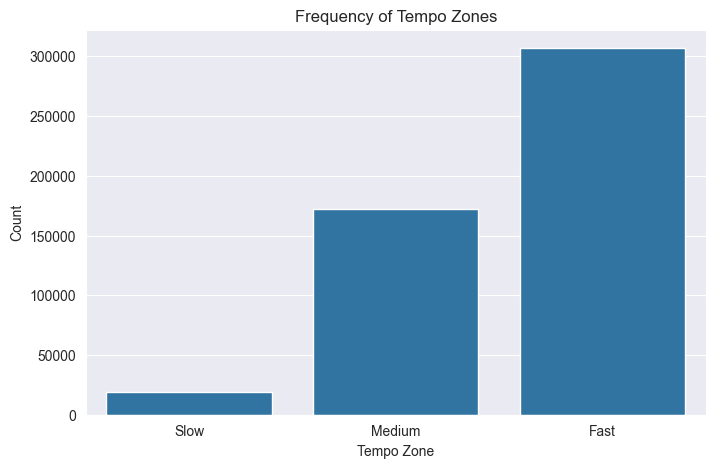

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Tempo zone', order=['Slow', 'Medium', 'Fast'])
plt.title('Frequency of Tempo Zones')
plt.xlabel('Tempo Zone')
plt.ylabel('Count')
plt.show()

In [80]:
import re

df['text'] = df['text'].str.lower()

custom_stop_words = {'chorus', 'bridge', 'verse', 'outro', 'intro', 'pre', ':'}

# Create regex pattern to match whole words (case-insensitive)
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in custom_stop_words) + r')\b'

# Replace with empty string
df['text'] = df['text'].str.replace(pattern, '', case=False, regex=True)
# Optional: Remove extra whitespace
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [82]:
df['Word count'] = df['text'].str.split().str.len()
df[['Word count', 'Popularity']].corr()

,Word count,Popularity
Word count,1.000000,0.016036
Popularity,0.016036,1.000000


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Now pass it to the vectorizer
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform(df['text'].fillna(''))

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [84]:
tfidf_df['Popularity'] = df['Popularity'].values
correlations = tfidf_df.corr()['Popularity'].drop('Popularity').sort_values(ascending=False)
print(correlations.head(10))  # Most positively correlated words
print(correlations.tail(10))  # Most negatively correlated words

yeah     0.062742
oh       0.048783
baby     0.026353
wanna    0.021809
me       0.020698
cause    0.020250
do       0.018061
got      0.015113
tell     0.013252
bitch    0.013139
Name: Popularity, dtype: float64
he    -0.021675
not   -0.023458
as    -0.024705
but   -0.025408
in    -0.028242
is    -0.030053
to    -0.034607
and   -0.037700
of    -0.043846
the   -0.047907
Name: Popularity, dtype: float64


In [90]:
# Include the best TF IDF counted words
top_positive = correlations.head(3).index.tolist()
top_negative = correlations.tail(3).index.tolist()

for word in top_positive + top_negative:
    df[f'has_{word}'] = df['text'].str.contains(word, case=False, regex=False).astype(int)

In [85]:
from langdetect import detect, DetectorFactory
import warnings

# Suppress the UserWarning from langdetect (often related to non-deterministic behavior)
warnings.filterwarnings("ignore", category=UserWarning, module='langdetect')

# Set a seed for langdetect to ensure consistent results, especially for short texts
DetectorFactory.seed = 42

def get_language(text):
    if pd.isna(text) or not isinstance(text, str) or len(text.strip()) == 0:
        return 'unknown' # Or 'N/A', 'empty', etc. for missing or empty lyrics
    try:
        return detect(text)
    except Exception as e:
        # langdetect can fail on very short/ambiguous texts
        return 'und' # 'und' stands for undetermined

# Apply this function to your 'lyrics' column
# Make sure you're applying it to the DataFrame that actually has the 'lyrics' column
# (e.g., df if you've populated it, or sample_df if you're testing)

if 'text' in df.columns: # Check if the 'lyrics' column exists in your main df
    print("\nStarting language detection...")
    df['Language'] = df['text'].apply(get_language)
    print("Language detection complete.")

    print("\nDistribution of detected languages:")
    print(df['Language'].value_counts())
else:
    print("\n'lyrics' column not found. Please ensure you have acquired and added song lyrics to your DataFrame.")


Starting language detection...
Language detection complete.

Distribution of detected languages:
Language
en    549005
tl       439
so       379
id       334
cy       229
af       140
sw       136
fr       106
nl       102
it        72
no        66
ca        65
pt        59
hr        48
es        38
da        37
et        36
sq        30
sv        27
de        21
pl        14
ro        13
fi        13
sl        12
cs         9
sk         7
tr         3
lt         2
vi         1
Name: count, dtype: int64


In [102]:
df['Language'].value_counts()

Language
en    549005
tl       439
so       379
id       334
cy       229
af       140
sw       136
fr       106
nl       102
it        72
no        66
ca        65
pt        59
hr        48
es        38
da        37
et        36
sq        30
sv        27
de        21
pl        14
ro        13
fi        13
sl        12
cs         9
sk         7
tr         3
lt         2
vi         1
Name: count, dtype: int64

In [88]:
# Create new column 'Set' based on 'Language'
df['English'] = df['Language'].str.strip().str.lower() == 'en'
# df.drop('Song Number', axis=1, inplace=True)
df['English'] = df['English'].astype(int)

In [92]:
correlation_matrix = df.corr(numeric_only=True)

# Drop 'Popularity' itself and sort
popularity_corr = correlation_matrix['Popularity'].drop('Popularity').sort_values(ascending=False)

print("Most positively correlated features with Popularity:")
print(popularity_corr.head(10))  # Top 10 positive correlations

print("\nMost negatively correlated features with Popularity:")
print(popularity_corr.tail(10))  # Top 10 negative correlations

Most positively correlated features with Popularity:
Good for Party                0.342272
Good for Social Gatherings    0.201440
Danceability                  0.107897
genre_pop                     0.105708
Loudness                      0.088321
Positiveness                  0.080531
has_yeah                      0.066710
has_oh                        0.060738
ts_4/4                        0.055707
Good for Exercise             0.053623
Name: Popularity, dtype: float64

Most negatively correlated features with Popularity:
Year                  -0.028989
Year Bin              -0.029378
Good for Work/Study   -0.033041
Length                -0.036613
Instrumentalness      -0.038875
genre_rap             -0.040087
ts_3/4                -0.044823
Liveness              -0.055598
Acousticness          -0.061172
Speechiness           -0.080374
Name: Popularity, dtype: float64


In [104]:
df.duplicated().sum()

TypeError: unhashable type: 'list'

In [93]:
df.to_csv('data/cleaned_data.csv', index=False)